In [34]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import sqlite3
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [11]:
# Connect to the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [12]:
# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    product TEXT,
    region TEXT,
    quantity INTEGER,
    sales_amount REAL
)
""")

In [13]:
# Sample data options
products = ['Widget A', 'Widget B', 'Widget C']
regions = ['North', 'South', 'East', 'West']
start_date = datetime.strptime('2024-01-01', '%Y-%m-%d')

In [14]:
# Insert 60 random records
for _ in range(60):
    date = (start_date + timedelta(days=random.randint(0, 90))).strftime('%Y-%m-%d')
    product = random.choice(products)
    region = random.choice(regions)
    quantity = random.randint(1, 20)
    sales_amount = round(quantity * random.uniform(10.0, 50.0), 2)

    cursor.execute("""
    INSERT INTO sales (date, product, region, quantity, sales_amount)
    VALUES (?, ?, ?, ?, ?)
    """, (date, product, region, quantity, sales_amount))

In [15]:
# Commit and close
conn.commit()
conn.close()

In [17]:
# Connect to database
conn = sqlite3.connect("sales_data.db")

In [19]:
# Load the data into a DataFrame
df = pd.read_sql_query("SELECT * FROM sales", conn)

In [20]:
# Preview the data
print(df.head())

   id        date   product region  quantity  sales_amount
0   1  2024-02-02  Widget A  South        14        485.43
1   2  2024-03-24  Widget B   East        17        801.23
2   3  2024-01-29  Widget C   West         9        166.20
3   4  2024-02-26  Widget A  North         2         65.23
4   5  2024-02-20  Widget A  South        16        546.89


In [21]:
# Dimensions and columns
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (60, 6)
Columns: Index(['id', 'date', 'product', 'region', 'quantity', 'sales_amount'], dtype='object')


In [22]:

# Data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            60 non-null     int64  
 1   date          60 non-null     object 
 2   product       60 non-null     object 
 3   region        60 non-null     object 
 4   quantity      60 non-null     int64  
 5   sales_amount  60 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.9+ KB
None


In [23]:
# Summary statistics
print(df.describe())

              id   quantity  sales_amount
count  60.000000  60.000000      60.00000
mean   30.500000  11.533333     368.17800
std    17.464249   5.438303     237.83256
min     1.000000   1.000000      11.63000
25%    15.750000   8.750000     173.59500
50%    30.500000  12.000000     324.53000
75%    45.250000  16.250000     533.82500
max    60.000000  20.000000     847.58000


In [24]:
# Check for missing values
print(df.isnull().sum())

id              0
date            0
product         0
region          0
quantity        0
sales_amount    0
dtype: int64


In [25]:
# Value counts for a categorical column (e.g., 'region')
if 'region' in df.columns:
    print(df['region'].value_counts())

North    17
West     16
South    14
East     13
Name: region, dtype: int64


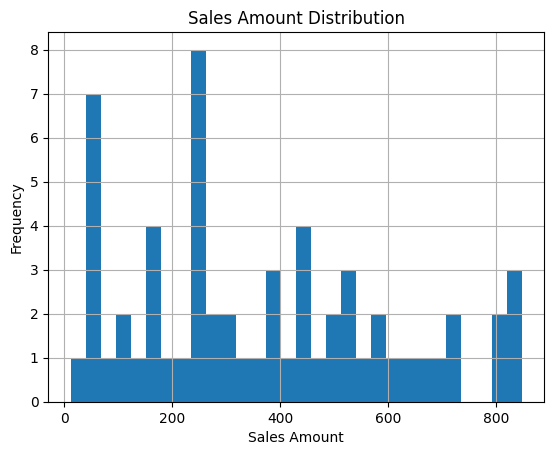

In [30]:
# Histogram for a numeric column
if 'sales_amount' in df.columns:
    df['sales_amount'].hist(bins=30)
    plt.title("Sales Amount Distribution")
    plt.xlabel("Sales Amount")
    plt.ylabel("Frequency")
    plt.show()

C:\Users\shaik\AppData\Local\Temp\ipykernel_21132\1905607925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


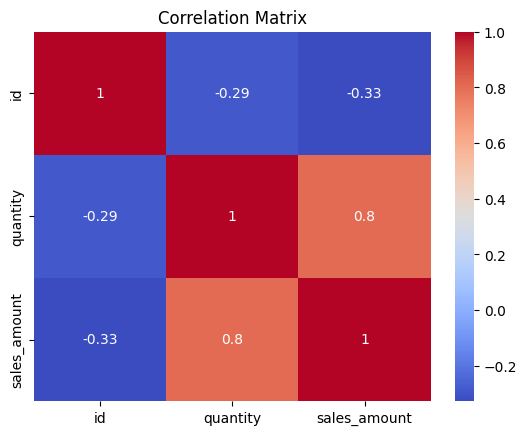

In [36]:
# Correlation heatmap (for numeric columns)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

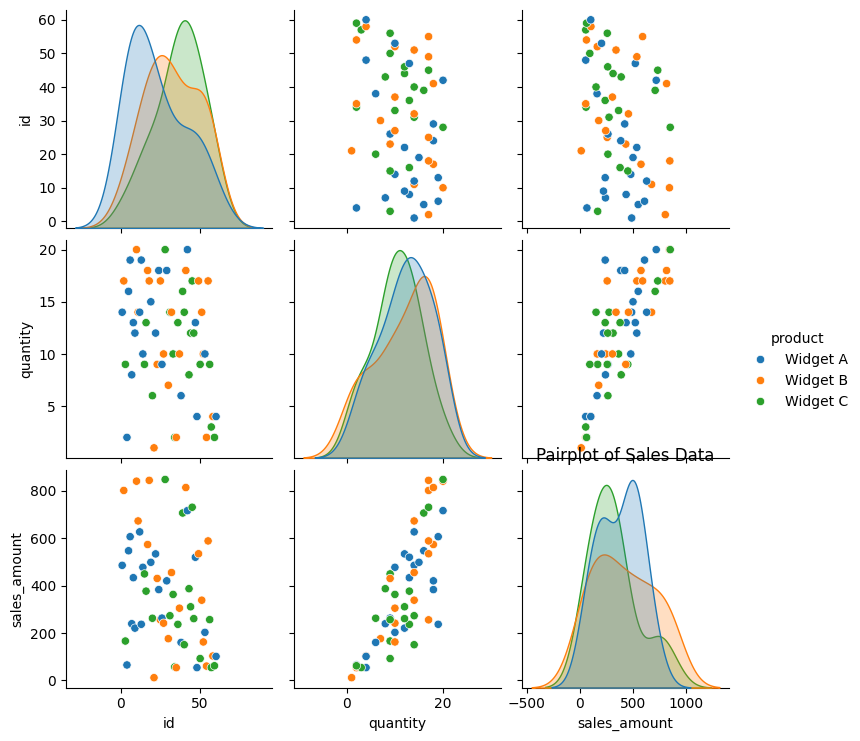

<Figure size 640x480 with 0 Axes>

In [40]:
sns.pairplot(df, hue='product', diag_kind='kde')
plt.title("Pairplot of Sales Data")
plt.show()
# Boxplot for sales amount by product  
plt.savefig('total_sales_by_product.png', dpi=300, bbox_inches='tight') 

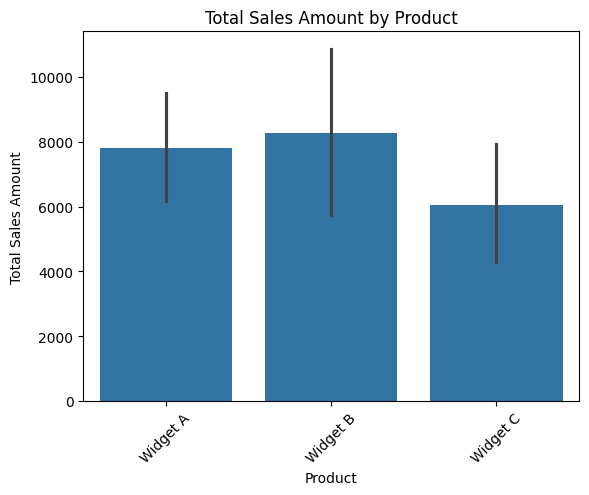

<Figure size 640x480 with 0 Axes>

In [42]:
sns.barplot (x='product', y='sales_amount', data=df, estimator=np.sum)
plt.title("Total Sales Amount by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()
plt.savefig('total_sales_by_product.png')
# Boxplot for sales amount by region

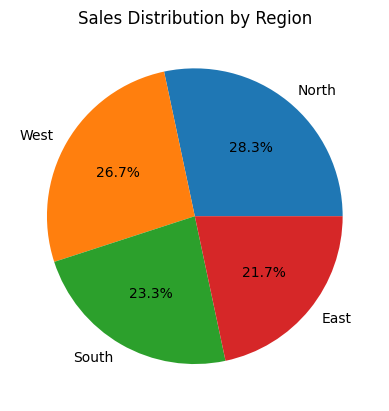

In [43]:
plt.pie(df['region'].value_counts(), labels=df['region'].value_counts().index, autopct='%1.1f%%')
plt.title("Sales Distribution by Region")
plt.show()

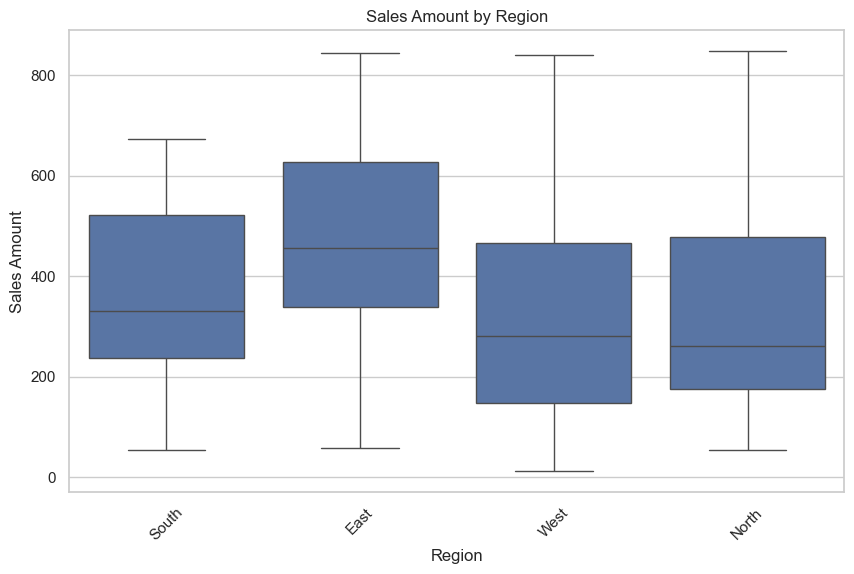

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='region', y='sales_amount', data=df)
plt.title("Sales Amount by Region")
plt.xlabel("Region")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()